In [33]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm
%matplotlib inline

In [34]:
os.chdir(r"C:\Users\Shashidhar\Desktop")
df = pd.read_csv('covid_19_data.csv')
print(df.info()) 
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              205951 non-null  int64  
 1   ObservationDate  205951 non-null  object 
 2   Province/State   150574 non-null  object 
 3   Country/Region   205951 non-null  object 
 4   Last Update      205951 non-null  object 
 5   Confirmed        205951 non-null  float64
 6   Deaths           205951 non-null  float64
 7   Recovered        205951 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ MB
None


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [35]:
df.columns = [x.lower() for x in df.columns]
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns

Index(['sno', 'observationdate', 'province/state', 'country/region',
       'last_update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [36]:
df['confirmed'] = df['confirmed'].apply(lambda x: int(x))
df['deaths'] = df['deaths'].apply(lambda x: int(x))
df['recovered'] = df['recovered'].apply(lambda x: int(x))
df['confirmed'].head(3)

0     1
1    14
2     6
Name: confirmed, dtype: int64

In [37]:
from datetime import date
from datetime import datetime
print(datetime.strptime(df['observationdate'][10000], "%m/%d/%Y").date())
df['observationdate'] = df['observationdate'].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y").date())
print(f"Result: {df['observationdate'][0]}, {type(df['observationdate'][0])}")

2020-03-29
Result: 2020-01-22, <class 'datetime.date'>


In [38]:
df['country/region'] = df['country/region'].apply(lambda x: x.lstrip())

In [39]:
df.loc[(df['country/region'] == 'Mainland China'), 'country/region'] = 'China'
df.loc[(df['country/region'] == 'Congo (Kinshasa)'), 'country/region'] = 'Democratic Republic of the Congo'
df.loc[(df['country/region'] == 'Congo (Brazzaville)'), 'country/region'] = 'Republic of the Congo'
df.loc[(df['country/region'] == 'Burma'), 'country/region'] = 'Myanmar'
df.loc[(df['country/region'] == 'occupied Palestinian territory'), 'country/region'] = 'Palestine'
df.loc[(df['country/region'] == 'West Bank and Gaza'), 'country/region'] = 'Palestine'
df.loc[(df['country/region'] == 'Republic of Ireland'), 'country/region'] = 'Ireland'
df.loc[(df['country/region'] == 'Saint Barthelemy'), 'country/region'] = 'Saint Barthélemy'
df.loc[(df['country/region'] == 'Bahamas, The'), 'country/region'] = 'Bahamas'
df.loc[(df['country/region'] == 'The Bahamas'), 'country/region'] = 'Bahamas'
df.loc[(df['country/region'] == 'Gambia, The'), 'country/region'] = 'Gambia'
df.loc[(df['country/region'] == 'The Gambia'), 'country/region'] = 'Gambia'
df.loc[(df['country/region'] == "('St. Martin',)"), 'country/region'] = 'Saint Martin'
df.loc[(df['country/region'] == "Curacao"), 'country/region'] = 'Curaçao'
df.loc[(df['country/region'] == "North Ireland"), 'country/region'] = 'United Kingdom'
df.loc[(df['country/region'] == 'Reunion'), 'country/region'] = 'Réunion'
df.loc[(df['country/region'] == 'UK'), 'country/region'] = 'United Kingdom'
df.loc[(df['country/region'] == 'US'), 'country/region'] = 'United States of America'
df[df['country/region'] == 'United States of America'].iloc[0:3]

,sno,observationdate,province/state,country/region,last_update,confirmed,deaths,recovered
31,32,2020-01-22,Washington,United States of America,1/22/2020 17:00,1,0,0
69,70,2020-01-23,Washington,United States of America,1/23/20 17:00,1,0,0
117,118,2020-01-24,Washington,United States of America,1/24/20 17:00,1,0,0


In [40]:
df[(df['country/region'] == 'Others')].head()
df[(df['country/region'] == 'Others') & (df['observationdate'] < date(2020,2,27))].tail()

,sno,observationdate,province/state,country/region,last_update,confirmed,deaths,recovered
2034,2035,2020-02-22,Diamond Princess cruise ship,Others,2020-02-20T15:53:03,634,2,1
2118,2119,2020-02-23,Diamond Princess cruise ship,Others,2020-02-23T22:33:03,691,3,0
2204,2205,2020-02-24,Diamond Princess cruise ship,Others,2020-02-23T22:33:03,691,3,0
2294,2295,2020-02-25,Diamond Princess cruise ship,Others,2020-02-23T22:33:03,691,3,0
2388,2389,2020-02-26,Diamond Princess cruise ship,Others,2020-02-26T19:33:02,705,4,10


In [41]:
dates = df[(df['country/region'] == 'Others') & (df['observationdate'] < date(2020,2,27))]['observationdate']
dates = list(dates.apply(lambda x: x.strftime("%b %d")))

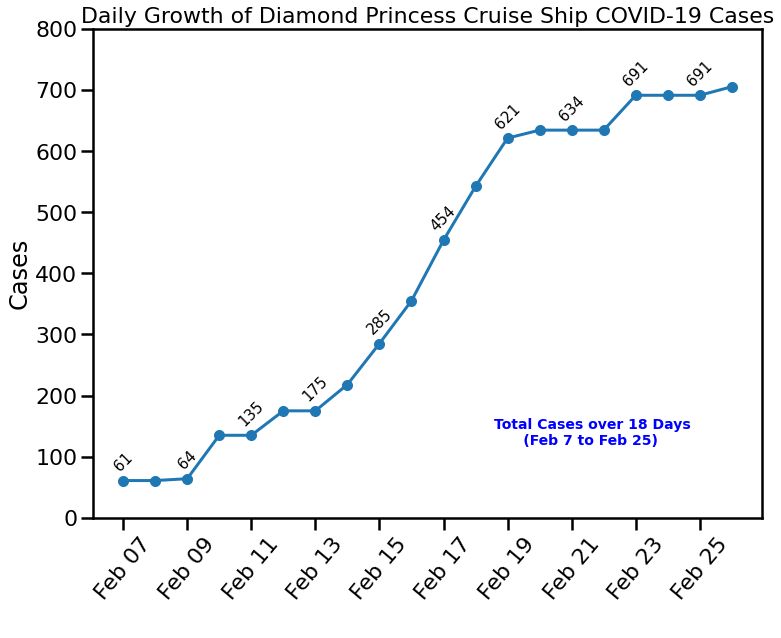

In [42]:
x = dates
y = df[(df['country/region'] == 'Others') & (df['observationdate'] < date(2020,2,27))]['confirmed']
plt.figure(figsize=(12,9))
plt.plot(x, y, marker='o', markersize= 10)
plt.ylabel('Cases')
plt.xlabel(' ')
plt.xticks(np.arange(0, len(dates), step=2),rotation=50)
plt.yticks(np.arange(0,820, step=100))
plt.annotate('Total Cases over 18 Days\n      (Feb 7 to Feb 25)', 
             xycoords='axes fraction', xy=[.6,.15], fontsize=14, weight=600, color='blue')

for x,y in zip(x[::2],y[::2]):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x,y),ha='center', rotation=45, xytext=(0,10), textcoords='offset points',fontsize=15)
plt.title('Daily Growth of Diamond Princess Cruise Ship COVID-19 Cases', fontsize=22)
sns.set_context('poster')
plt.show(); 

In [43]:
df = df[(df['country/region'] != 'Others') & (df['country/region'] != 'Diamond Princess')]
df= df[(df['country/region'] != 'MS Zaandam')]
df = df[(df['country/region'] != 'Kosovo')] 
df = df[(df['country/region'] != 'Holy See')]
df = df[(df['country/region'] != 'Vatican City')]
df = df[(df['country/region'] != 'Timor-Leste')] 
df = df[(df['country/region'] != 'East Timor')] 
df = df[(df['country/region'] != 'Channel Islands')]
df = df[(df['country/region'] != 'Western Sahara')] 

In [44]:
beginning_date = df['observationdate'].sort_values(ascending=True).head(1).item()
dff = (df[df['observationdate'].eq(beginning_date)]
       .groupby('country/region').sum()
       .head(10)).sort_values(by='confirmed',ascending=False).reset_index() 

dff 

,country/region,sno,confirmed,deaths,recovered
0,China,535,547,17,28
1,Thailand,37,4,0,2
2,Japan,36,2,0,0
3,Macau,21,1,0,0
4,South Korea,38,1,0,0
5,Taiwan,29,1,0,0
6,United States of America,32,1,0,0
7,Hong Kong,13,0,0,0


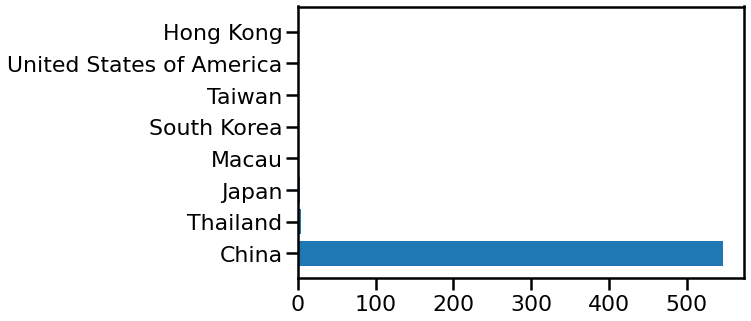

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dff['country/region'], dff['confirmed']);

In [46]:
top_countries = df.groupby(['country/region'])['confirmed'].sum().sort_values(ascending=False).reset_index()['country/region'].unique()
top_countries = list(top_countries)
top_countries[0:3]

['United States of America', 'India', 'Brazil']

In [47]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
top_continents = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
                  for country in top_countries]

In [48]:
import random
random_number = random.randint(0,16777215)
hex_number = str(hex(random_number))
hex_number ='#'+ hex_number[2:] 
def generate_hexcode(quantity):
    colors = []
    for i in range(0,quantity+1):
        random_number = random.randint(10000000,16777215)
        hex_number = str(hex(random_number))
        hex_number ='#'+ hex_number[2:]
        colors.append(hex_number)
    return colors
colors = generate_hexcode(len(continents))
colors[0:6]

['#ec2778', '#bef8b4', '#df8238', '#fcb7ac', '#e4b5ea', '#c7755e']

In [49]:
colors = dict(zip([x for x in continents.values()], colors))
colors

{'North America': '#ec2778',
 'South America': '#bef8b4',
 'Asia': '#df8238',
 'Australia': '#fcb7ac',
 'Africa': '#e4b5ea',
 'Europe': '#c7755e'}

In [50]:
colors = {'North America': '#FF81C0',
 'South America': '#1FA774',
 'Asia': '#41FDFE',
 'Australia': '#90E4C1',
 'Africa': '#FFD1DF',
 'Europe': '#FCF679'}

In [51]:
# assign country to its continent, creates dictionary e.g. {'China': 'Asia','Italy': 'Europe'}
top_country_continents = dict(zip(top_countries, top_continents))

In [52]:
[colors[top_country_continents[x]] for x in dff['country/region']]

['#41FDFE',
 '#41FDFE',
 '#41FDFE',
 '#41FDFE',
 '#41FDFE',
 '#41FDFE',
 '#FF81C0',
 '#41FDFE']

In [53]:
top_country_continents['China']

'Asia'

In [54]:
colors['Asia']

'#41FDFE'

In [55]:
colors[top_country_continents['China']]

'#41FDFE'

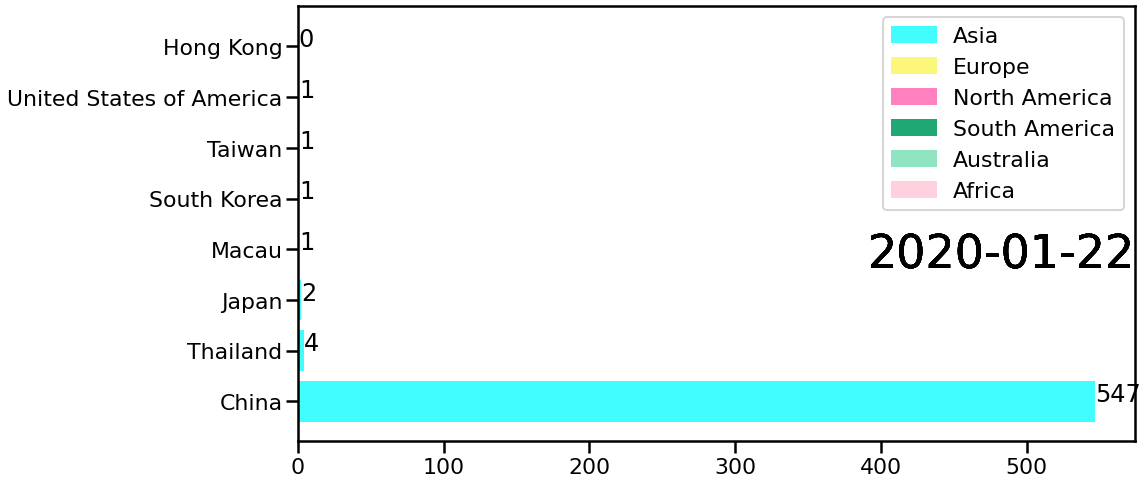

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['country/region'], dff['confirmed'], color=[colors[top_country_continents[x]] 
                                                        for x in dff['country/region']])
for i, (confirmed, country) in enumerate(zip(dff['confirmed'], dff['country/region'])):
    ax.text(confirmed, i,     confirmed,           ha='left')  
    ax.text(1, 0.4, beginning_date, transform=ax.transAxes, size=46, ha='right')
    countries = []
    countries.append(dff['country/region'])
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
north_america = mpatches.Patch(color='#FF81C0', label='North America')
asia = mpatches.Patch(color='#41FDFE', label='Asia')
europe = mpatches.Patch(color='#FCF679', label='Europe')
south_america = mpatches.Patch(color='#1FA774', label='South America')
australia = mpatches.Patch(color='#90E4C1', label='Australia')
africa = mpatches.Patch(color='#FFD1DF', label='Africa')
plt.legend(handles=[asia, europe, north_america, south_america, australia, africa]);

In [57]:
days_since = abs((df['observationdate'].sort_values(ascending=True).head(1).item() - 
                  df['observationdate'].sort_values(ascending=False).head(1).item()).days)
days_since

363

In [58]:
beginning_date = df['observationdate'].sort_values(ascending=True).head(1).item()
print(beginning_date)
date_list = pd.date_range(beginning_date, periods=days_since+1).to_list()
date_list[0].date()

2020-01-22


datetime.date(2020, 1, 22)

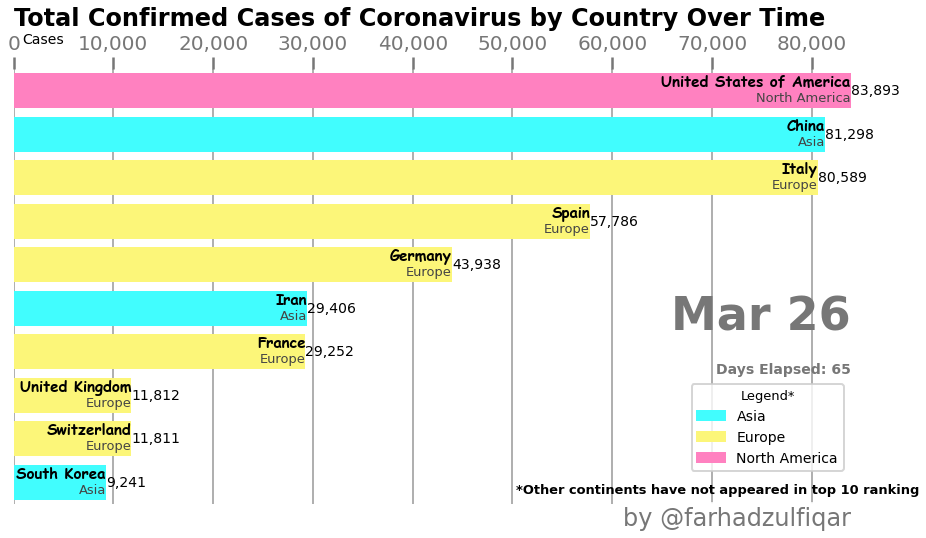

In [59]:
fig, ax = plt.subplots(figsize=(15, 8)) 
first_day = date(2020,1,22) 
def draw_barchart(date):
    dff = df[df['observationdate'].eq(date)]\
    .groupby(['country/region','observationdate'])\
    .sum().reset_index().sort_values(by='confirmed',ascending=False).head(10) 
    dff = dff[::-1] 
    ax.clear()
    ax.barh(dff['country/region'], dff['confirmed'], \
            color=[colors[top_country_continents[x]] for x in dff['country/region']])
    for i, (confirmed, country) in enumerate(zip(dff['confirmed'], dff['country/region'])):
        ax.text(confirmed, i,     country,           size=15, \
                weight=600, ha='right', va='bottom', fontfamily= 'fantasy') 
        ax.text(confirmed, i-.25, top_country_continents[country], \
                size=13, color='#444444', ha='right', va='baseline',) 
        ax.text(confirmed, i,     f'{confirmed:,.0f}',  size=14, \
                ha='left',  va='center') 
    ax.text(1, 0.4, date.strftime('%b %d'), transform=ax.transAxes,  
            color='#777777', size=46, ha='right', 
            weight=800) 
    days_elapsed = abs(datetime.date(date)-first_day)
    
    ax.text(1, 0.3, f'Days Elapsed: {abs(days_elapsed.days)+1}', transform=ax.transAxes, 
            color='#777777', size=14, ha='right', 
            weight=800)
    ax.text(0.01, 1.06, 'Cases', transform=ax.transAxes, size=14, color='#000000') 
    north_america = mpatches.Patch(color='#FF81C0', label='North America')
    asia = mpatches.Patch(color='#41FDFE', label='Asia')
    europe = mpatches.Patch(color='#FCF679', label='Europe')
    ax.legend(handles=[asia, europe, north_america],loc = 4, bbox_to_anchor=[1,0.06],fontsize=14, title='Legend*',
             title_fontsize=13)
    ax.annotate('*Other continents have not appeared in top 10 ranking', xy=[0.6,0.025], 
                 xycoords='axes fraction', annotation_clip=True, ha='left', fontsize=13, weight=550) 
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=20)
    ax.tick_params(axis='y', colors='#000000', labelsize=15)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.10, 'Total Confirmed Cases of Coronavirus by Country Over Time',
            transform=ax.transAxes, size=24, weight=600, ha='left')    
    ax.text(1, -.05, 'by @farhadzulfiqar', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
draw_barchart(date_list[64])


Animation size has reached 21036342 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


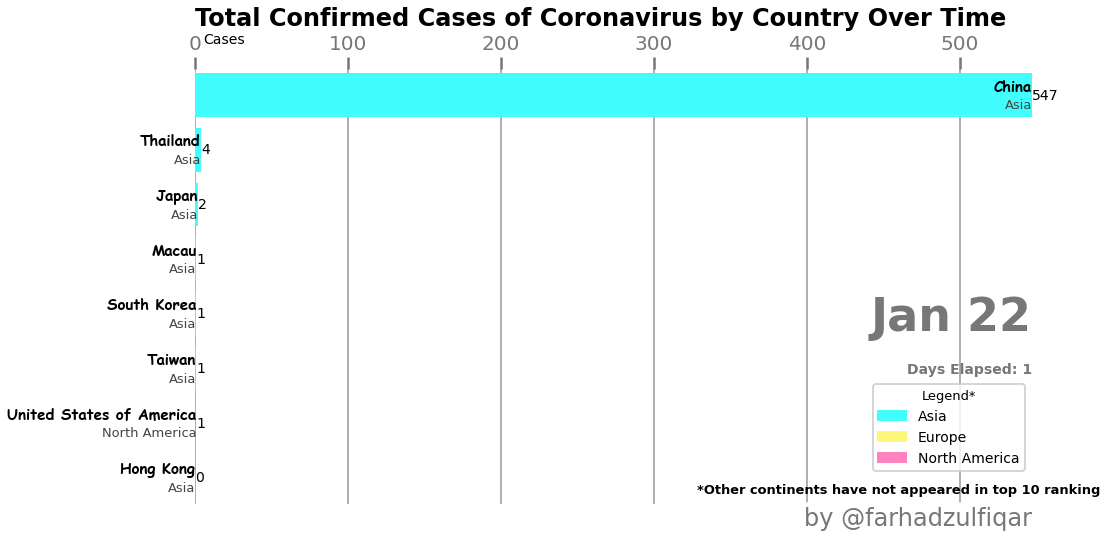

In [60]:
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list)
HTML(animator.to_jshtml())
writer = animation.ImageMagickFileWriter()
animator.save('COVID19RaceBarChart.gif', writer=writer)